# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.18 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [3]:
from unityagents import UnityEnvironment
from maddpg import maddpg_train
import matplotlib.pyplot as plt

# Unity environment
env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]
states = env_info.vector_observations

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [4]:
state_size = states.shape[1]
action_size = brain.vector_action_space_size
agents_num=2
scores, avg_scores =  maddpg_train(agents_num, action_size, state_size, env, 
                       brain_name,buffer_size = int(1e5),batch_size = 256, seed = 0, n_episodes=50000, 
                       max_t=4000, print_every=100, update_every = 4, tau = 1e-3, actorLr =1e-4,
                       criticLr = 1e-3, weight_decay = 0)


Episode 100	Average Score in 100 episodes: 0.01	 Episode score: 0.0
1631
Episode 200	Average Score in 100 episodes: 0.01	 Episode score: 0.0
3283
Episode 300	Average Score in 100 episodes: 0.01	 Episode score: 0.0
5010
Episode 400	Average Score in 100 episodes: 0.01	 Episode score: 0.0
6650
Episode 500	Average Score in 100 episodes: 0.01	 Episode score: 0.10000000149011612
8287
Episode 600	Average Score in 100 episodes: 0.01	 Episode score: 0.0
10023
Episode 700	Average Score in 100 episodes: 0.00	 Episode score: 0.0
11474
Episode 800	Average Score in 100 episodes: 0.01	 Episode score: 0.0
13151
Episode 900	Average Score in 100 episodes: 0.00	 Episode score: 0.0
14571
Episode 1000	Average Score in 100 episodes: 0.00	 Episode score: 0.0
15991
Episode 1100	Average Score in 100 episodes: 0.00	 Episode score: 0.0
17411
Episode 1200	Average Score in 100 episodes: 0.00	 Episode score: 0.0
18831
Episode 1300	Average Score in 100 episodes: 0.00	 Episode score: 0.0
20251
Episode 1400	Average Sc

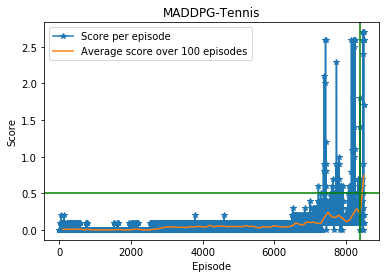

In [15]:
# plot result
import numpy as np
episodes = list(range(1, len(scores)+1))
plt.plot(episodes, scores,marker='*', label="Score per episode")
plt.plot(np.array(list(range(1,len(avg_scores)+1)))*100,avg_scores, label="Average score over 100 episodes")
plt.title("MADDPG-Tennis")
plt.xlabel("Episode")
plt.ylabel("Score")
plt.axvline(episodes[-1]-100,color='g')
plt.axhline(0.5,color='g')
plt.legend()
plt.savefig('MADDPG_Tennis_score.png', bbox_inches='tight')